In [1]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

__Задача 1__

Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150
```
Без использования статистических функций вроде `mean`, `std`, `var`, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

#### Решение:

In [2]:
income = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]
df_income = pd.DataFrame(income)

Среднее арифметическое: 

In [3]:
income_avg = df_income[0].sum() / df_income[0].count()

print(income_avg)

65.3


In [4]:
print(df_income[0].mean());

65.3


Cреднее квадратичное отклонение:

In [5]:
income_stg = np.sqrt(((df_income[0] - df_income[0].mean()) ** 2).sum() / df_income[0].count())

income_stg

30.823854398825596

In [6]:
print(df_income[0].std(ddof=0))

30.823854398825596


Смещенная и несмещенная дисперсии для выборки соответственно: 

In [7]:
income_var = ((df_income[0] - df_income[0].mean()) ** 2).sum() / df_income[0].count()

income_var

950.11

In [8]:
income_var2 = ((df_income[0] - df_income[0].mean()) ** 2).sum() / (df_income[0].count() - 1)

income_var2

1000.1157894736842

In [9]:
df_income[0].var(ddof=0)

950.11

In [10]:
df_income[0].var(ddof=1)

1000.1157894736842

__Задача 2__

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из `boxplot`. В этой задаче можно использовать статистические функции.

#### Решение: 

In [11]:
df_income[0].quantile([0.25, 0.75])

0.25    42.0
0.75    81.0
Name: 0, dtype: float64

In [12]:
q1 = df_income[0].quantile(0.25)
q3 = df_income[0].quantile(0.75) 

iqr = q3 - q1

iqr

39.0

{'whiskers': [<matplotlib.lines.Line2D at 0x7faa5860de80>,
 'caps': [<matplotlib.lines.Line2D at 0x7faa5861b828>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faa5860dcf8>],
 'medians': [<matplotlib.lines.Line2D at 0x7faa5861beb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faa5861be80>],
 'means': []}

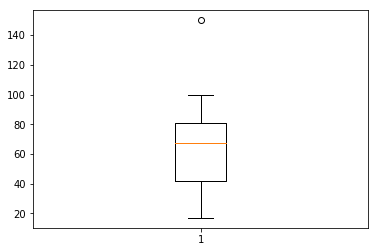

In [13]:
plt.boxplot(df_income[0])

In [14]:
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)

boxplot_range

(-16.5, 139.5)

In [15]:
outliers = df_income.loc[(df_income[0] < boxplot_range[0]) | (df_income[0] > boxplot_range[1])]

outliers.shape[0]

1

Доля выбросов: 

In [16]:
outliers.shape[0] / df_income.shape[0]

0.05

__Задача 3__

Для распределения Пуассона с параметром `a = 5` найти теоретические (т.е. используя закон распределения, а не выборку) мат. ожидание, моду и медиану.

#### Решение:

Распределение Пуассона является предельным случаем биномиального. Если в последнем имеется очень большое число экспериментов ($n \rightarrow \infty$), а вероятность наступления события $A$ достаточно мала (можно считать, что $p \approx a/n$), то такое распределение становится очень похоже на распределение Пуассона с параметром $a = np$.

Математическое ожидание и дисперсия распределения Пуассона равны:

$$M(X) = D(X) = a = 5$$

Теоретические доказательство будет выглядеть примерно так: 

$$M(X)=\displaystyle\sum_{k = 0}^\inf k \dfrac {a^k}{k!} e^{-a} = e^{-a} \displaystyle\sum_{k = 1}^\inf k \dfrac {a^k}{(k-1)!} = a e^{-a} \displaystyle\sum_{k = 1}^\inf k \dfrac {a^{k-1}}{(k-1)!} = a e^{-a} \displaystyle\sum_{m = 0}^\inf k \dfrac {a^{m}}{(m)!} = a e^{-a}e^{a} = a = 5 $$

Попробуем также использовать разные значения $k$ для определения матожидания:

In [29]:
from decimal import *
def poisson_distr(a, k):
    
    return (Decimal(a ** k) * Decimal(np.exp(-a)))/ Decimal(np.math.factorial(k))

In [30]:
a = 5
k = [10, 20, 50, 100]

for j in k:
    M_x = 0
    for i in range(1, j):
        M_x += a * poisson_distr(5, i)
    print(M_x)

4.807169978473548537489099729
4.966308538936662136682494499
4.966310265004572593912593027
4.966310265004572593912593027


Поскольку a = 5 - число целое, то распределение Пуассона имеет два модальных значения моды: 5. 
Медиана распределения Пуассона также равна 5, поскольку a = 5 – целое число. 

In [34]:
poisson = np.random.poisson(5, 1000)

In [35]:
poisson.mean()

4.965

__Задача 4__

В университет на факультеты `A` и `B` поступило равное количество студентов, а на факультет `C` студентов поступило столько же, сколько на `A` и `B` вместе. Вероятность того, что студент факультета `A` сдаст первую сессию, равна 0.8. Для студента факультета `B` эта вероятность равна 0.7, а для студента факультета `C` - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете `A`? б) на факультете `B`? в) на факультете `C`?

_Замечание_: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

#### Решение: 

Будем считать, что поступление на факультеты - это равновероятное событие, но, поскольку на факультете $C$ в два раза больше мест, то вероятности поступления для студента будут следующие: 

$$ P(A_A) = \dfrac{1}{4},  P(A_B) = \dfrac{1}{4},  P(A_C) = \dfrac{1}{2} $$

После сдачи первой сессии наблюдалось событие B, условные вероятности каждого из них равны:

$$ P(B | A_A) = 0.25 * 0.8 = 0.2$$

$$ P(B | A_B) = 0.25 * 0.7 = 0.175$$

$$ P(B | A_C) = 0.5 * 0.9 = 0.45$$

По формуле Байеса находим вероятности поступления на каждый из факультетов:

$$ P(A_A|B) = \dfrac{0.2 * 0.25}{0.2 * 0.25 + 0.175 * 0.25 + 0.45 * 0.5} = 0.157$$

$$ P(A_B|B) = \dfrac{0.175 * 0.25}{0.2 * 0.25 + 0.175 * 0.25 + 0.45 * 0.5} = 0.137$$

$$ P(A_C|B) = \dfrac{0.45 * 0.5}{0.2 * 0.25 + 0.175 * 0.25 + 0.45 * 0.5} = 0.706$$